In [16]:
#!pip install scikeras

In [17]:
#import pandas as pd
#import numpy as np
#import tensorflow as tf
#from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from sklearn import metrics
#from imblearn.over_sampling import ADASYN
#from google.colab import drive
#drive.mount('/content/drive/')
#import sys
#sys.path.append('/content/drive/MyDrive')
#from scikeras.wrappers import KerasClassifier
#
#from binary_load import binary_load_dataset
#
#from tensorflow.keras.models import Sequential
#from tensorflow import keras
#from tensorflow.keras import layers as Layer
#from tensorflow.keras.metrics import Recall, Precision, BinaryAccuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives

In [18]:
import sys
sys.path.append('../')  # 상위 폴더(main_folder)의 경로를 추가

from binary_load import binary_load_dataset

In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from imblearn.over_sampling import ADASYN
from scikeras.wrappers import KerasClassifier

from binary_load import binary_load_dataset

from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers as Layer
from tensorflow.keras.metrics import Recall, Precision, BinaryAccuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives

In [20]:
csv_loca = "../../../../data/Star.csv"
TEST_SIZE = 0.2
VAL_SIZE = 0.2
RANDOM_STATE = 42

In [21]:
def modelling(nodes1 = 8, nodes2= 6, nodes3 = 4, drop_rate= 0.2, activation= 'relu'):
  # 모델 만들기
  # 뉴런의 개수는 input과 output 사이의 숫자를 넣으라고 한다. --> 사용, 왜냐하면 시간이 적게 걸려서
  # 뉴런의 개수는 input의 2/3 정도 넣라고 한다.
  # 뉴런의 개수는 input의 두배보다는 적게 넣라고 한다.

  model = Sequential([Layer.Dense(12, input_shape=(8,))])
  model.add(Layer.Dense(nodes1, activation = activation))
  model.add(Layer.BatchNormalization())
  model.add(Layer.Dropout(drop_rate))

  model.add(Layer.Dense(nodes2, activation = activation))
  model.add(Layer.BatchNormalization())
  model.add(Layer.Dropout(drop_rate))

  model.add(Layer.Dense(nodes3, activation = activation))
  model.add(Layer.BatchNormalization())
  model.add(Layer.Dropout(drop_rate))

  model.add(Layer.Dense(1, activation = 'sigmoid'))

  metrics = [
      TruePositives(name = 'tp'),
      TrueNegatives(name = 'tn'),
      FalsePositives(name = 'fp'),
      FalseNegatives(name = 'fn'),
      Recall(name = 'recall'),
      Precision(name = 'precision'),
      BinaryAccuracy(name = 'binary accuracy') # Binary Accuracy를 사용 안 하는 이유는 accuracy가 자동적으로 Binary Accuracy로 compile할 때 바꾸기 때문.
  ]

  model.compile(optimizer = 'adam',
                loss='binary_crossentropy',
                metrics = metrics)

  return model

In [22]:
X_train, X_val, X_test, y_train, y_val, y_test, X_train_ad, X_val_ad, X_test_ad, y_train_ad, y_val_ad, y_test_ad  = binary_load_dataset(csv_loca, TEST_SIZE, VAL_SIZE, RANDOM_STATE)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((11454, 8), (11454,), (2864, 8), (2864,), (3580, 8), (3580,))

In [23]:
X_train_ad.shape, y_train_ad.shape, X_val_ad.shape, y_val_ad.shape, X_test_ad.shape, y_test_ad.shape

((20711, 8), (20711,), (5178, 8), (5178,), (6473, 8), (6473,))

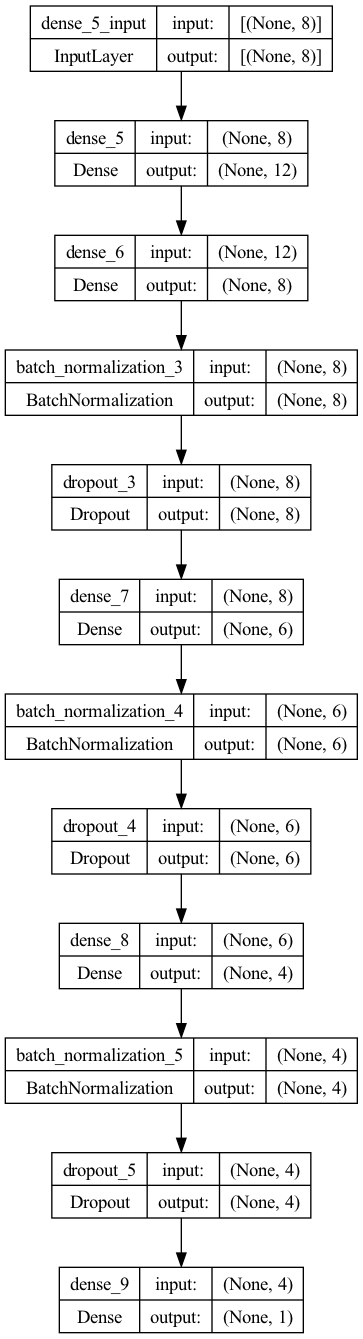

In [24]:
model = modelling()
keras.utils.plot_model(model, show_shapes=True)

In [25]:
model.fit(X_train, y_train, batch_size= 100, epochs= 10,  validation_data=(X_val, y_val))


model.evaluate(X_test, y_test, verbose=2)

Epoch 1/10


115/115 [==============================] - 1s 2ms/step - loss: 0.7013 - tp: 644.0000 - tn: 5846.0000 - fp: 4559.0000 - fn: 405.0000 - recall: 0.6139 - precision: 0.1238 - binary accuracy: 0.5666 - val_loss: 0.5904 - val_tp: 16.0000 - val_tn: 2602.0000 - val_fp: 0.0000e+00 - val_fn: 246.0000 - val_recall: 0.0611 - val_precision: 1.0000 - val_binary accuracy: 0.9141
Epoch 2/10
115/115 [==============================] - 0s 1ms/step - loss: 0.4810 - tp: 711.0000 - tn: 9151.0000 - fp: 1254.0000 - fn: 338.0000 - recall: 0.6778 - precision: 0.3618 - binary accuracy: 0.8610 - val_loss: 0.4523 - val_tp: 34.0000 - val_tn: 2602.0000 - val_fp: 0.0000e+00 - val_fn: 228.0000 - val_recall: 0.1298 - val_precision: 1.0000 - val_binary accuracy: 0.9204
Epoch 3/10
115/115 [==============================] - 0s 908us/step - loss: 0.3565 - tp: 676.0000 - tn: 9929.0000 - fp: 476.0000 - fn: 373.0000 - recall: 0.6444 - precision: 0.5868 - binary accuracy: 0.9259 - val_loss: 0.2905 - val_tp: 162.0000 - val_tn: 

[0.08654733002185822,
 248.0,
 3246.0,
 6.0,
 80.0,
 0.7560975551605225,
 0.9763779640197754,
 0.9759776592254639]

In [26]:
y_test_pred = model.predict(X_test)

y_test_pred = (y_test_pred > 0.5).astype(np.float32)

112/112 [==============================] - 0s 524us/step


In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

cm = pd.DataFrame(cm)
cm.columns = ['Predicted 0', 'Predicted 1']
cm.rename(index={0: "True 0", 1: "True 1"}, inplace = True)
cm

,Predicted 0,Predicted 1
True 0,3246,6
True 1,80,248


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3252
           1       0.98      0.76      0.85       328

    accuracy                           0.98      3580
   macro avg       0.98      0.88      0.92      3580
weighted avg       0.98      0.98      0.97      3580

